In [2]:
import pandas as pd
import numpy as np

#### Hyper-parameters tuning from Sklearn.
http://scikit-learn.org/stable/modules/grid_search.html#grid-search

In [78]:
path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Bayesian/'
data=pd.read_csv(path+"example3.csv")

X=np.matrix(data.iloc[:,:-1])
y=np.asarray(data.Y)

In [80]:
np.logspace(-6,0,10)

array([  1.00000000e-06,   4.64158883e-06,   2.15443469e-05,
         1.00000000e-04,   4.64158883e-04,   2.15443469e-03,
         1.00000000e-02,   4.64158883e-02,   2.15443469e-01,
         1.00000000e+00])

In [81]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
param_grid ={'alpha':np.logspace(-6, 0, 50)}
##########################################################################

OS_linear=[]
OS_ridge=[]
OS_tune_alpha=[]
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size = 0.3, random_state =i)
    lm=linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    OS_linear.append(1-((lm.predict(X_test)-y_test)**2).mean()/y_test.var())
    
    ri=linear_model.Ridge(alpha=10E+5)
    ri.fit(X_train,y_train)
    OS_ridge.append(1-((ri.predict(X_test)-y_test)**2).mean()/y_test.var())
    
    rr=linear_model.Ridge()
    gr=GridSearchCV(rr,param_grid=param_grid)
    rs=gr.fit(X_train,y_train)
    OS_tune_alpha.append(1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var())

print np.mean(OS_linear)
print np.mean(OS_ridge)
print np.mean(OS_tune_alpha)

-1.51840012877
0.384430031631
0.591876417765


### Decision Tree. 

Stop-and-Frisk Data set: https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

Please download the data set here or on NYU-Classes.
https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/

file: "session_3_stop.csv"

In [3]:
data=pd.read_csv("session_3_stop.csv")

In [4]:
data.head()

,suspected.crime,found.weapon,found.gun,arrested,frisked,searched,summons.issued,found.contraband,force.hands,force.wall,...,additional.time,additional.sights,additional.other,radio.run,day,month,time.period,date,lat,lon
0,cpw,False,False,False,True,False,False,False,True,True,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
1,cpw,False,False,False,True,False,False,False,True,False,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
2,cpw,False,False,False,True,False,False,False,True,False,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
3,cpw,False,False,False,True,False,False,False,True,True,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
4,cpw,False,False,False,True,False,False,False,False,False,...,True,False,False,False,Saturday,January,1,2011-01-01,40.605831,-73.757783


In [7]:
# Let's take "found.weapon" as target variable. 
# For feature space, lets use features from "suspect.race" to "time.period". We must get rid of
#all those features which were recorded after stop such as "fund.gun","arrested","force." and etc.
data=data.dropna()

#if use this sample data, you will see that 
data1=data.sample(frac=0.2,random_state=99)

#b) Prepare target variable and feature space:
Y=data.loc[:,"found.weapon"]

#Get the features space and make dummy variables. 
X=data.loc[:,"suspect.race":"time.period"]
X=pd.get_dummies(X)

#a)Split data set to training and testing data:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=999)

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train.shape

(201709, 64)

#### Part one: IS and OS Accuracy of prediction. 

DecisionTreeClassifier:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [9]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [10]:
rf=DTC()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.99998016945203239

In [98]:
rf.score(X_test,Y_test)

0.94364242087729044

### Practice One: Cross-validation for 10 times and get the average OS Accuracy. 

Use: train_test_split

In [19]:
from sklearn.model_selection import train_test_split

In [99]:
OS=[]
for i in range(10):
    X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3)
    rf=DTC()
    rf.fit(X_train,Y_train)
    OS.append(rf.score(X_test,Y_test))

In [100]:
np.mean(OS)

0.94358920969831561

#### Does that mean our model is super good? However... 

In [101]:
1-Y_test.sum()*1.0/len(Y_test)

0.96592171016102168

### Let's use ROC AUC instead of accuracy.

ROC, Area under the curve:
http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Youtube:
https://www.youtube.com/watch?v=hnRBl9-BzjQ

In [14]:
from sklearn.metrics import roc_auc_score as rs

In [15]:
AUC_IS=[]
AUC_OS=[]
for i in range(10):
    X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3)
    rf=DTC()
    rf.fit(X_train,Y_train)
    pred=rf.predict(X_test)
    AUC_OS.append(rs(np.array(Y_test.apply(int)),pred))
    AUC_IS.append(rs(np.array(Y_train.apply(int)),rf.predict(X_train)))

In [16]:
print "IS AUC: {}".format(np.mean(AUC_IS))
print "OS AUC: {}".format(np.mean(AUC_OS))

IS AUC: 0.999799753024
OS AUC: 0.624647546316


### Control the complexity of the Decision Tree.

In [13]:
#Use OS accuracy.

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3,random_state=999)
OS=[]
for i in range(2,50,2):
    rf=DTC(max_leaf_nodes=i)
    rf.fit(X_train,Y_train)
    OS.append(rf.score(X_test,Y_test))

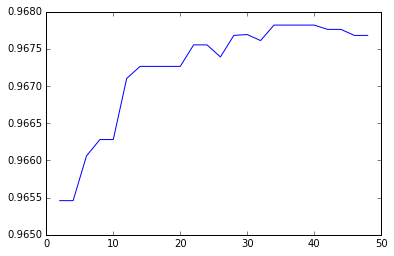

In [104]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(range(2,50,2),OS)

In [105]:
# Use: Predict_proba
tm=pd.concat((pd.DataFrame(rf.predict_proba(X_test)),pd.DataFrame(rf.predict(X_test))),axis=1)
tm.head(5)

,0,1,0
0,0.294118,0.705882,True
1,0.988817,0.011183,False
2,0.988817,0.011183,False
3,0.988817,0.011183,False
4,0.988817,0.011183,False


In [33]:
real=np.array(Y_test.apply(int))
AUC=[]
for i in range(2,100,3):    
    rf = DTC(max_leaf_nodes=i)
    rf.fit(X_train, Y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(rs(real,pred))

real=np.array(Y_test.apply(int))
AUC=[]
for i in range(1,20,2):    
    rf = DTC(max_depth=i)
    rf.fit(X_train, Y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(rs(real,pred))

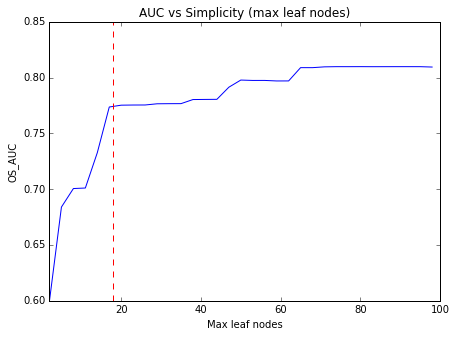

In [36]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(7,5))
plt.plot(range(2,100,3),AUC)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.axvline(18,color='r',linestyle='--')
plt.xlim(2,100)
plt.show()

### Practice two: Please use max_depth to control the complexity of the decision tree and repeat this process.

Try max_depth from range(1,20,2),and plot OS_AUC vs Max Depth. What is the max_depth you plan to choose?

In [5]:
real=np.array(Y_test.apply(int))
AUC=[]
for i in range(1,20,2):    
    rf = DTC(max_depth=i)
    rf.fit(X_train, Y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(rs(real,pred))

NameError: name 'Y_test' is not defined

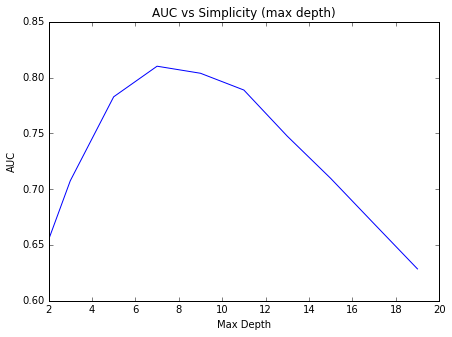

In [109]:
plt.figure(figsize=(7,5))
plt.plot(range(1,20,2),AUC)
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(32,color='r',linestyle='--')
plt.xlim(2,20)
plt.show()

### Feature Importance. (Decision trees for feature selection)
The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

In [22]:
rf = DTC(max_depth=9)
rf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:3,:]

,variables,importance
6,stopped.bc.object,0.302321
44,location.housing_transit,0.234216
13,precinct,0.0902564


In [19]:
#Let's generate our new training and testing model by these three features.
X_train_simple=X_train.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]
X_test_simple=X_test.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]

In [20]:
#Let's see the performance of this simple model:
real=np.array(Y_test.apply(int))
rf = DTC(max_leaf_nodes=10) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, Y_train)
pred=rf.predict_proba(X_test_simple)[:,1]
print("The AUC score for this simple model with 3 features is : {}".format(rs(real,pred)))

The AUC score for this simple model with 3 features is : 0.712915677389


### Visulize the Tree we built. 
conda install graphviz

pip install pydot

pip install pydotplus

For people who experienced this error: "GraphViz's executables not found"

http://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

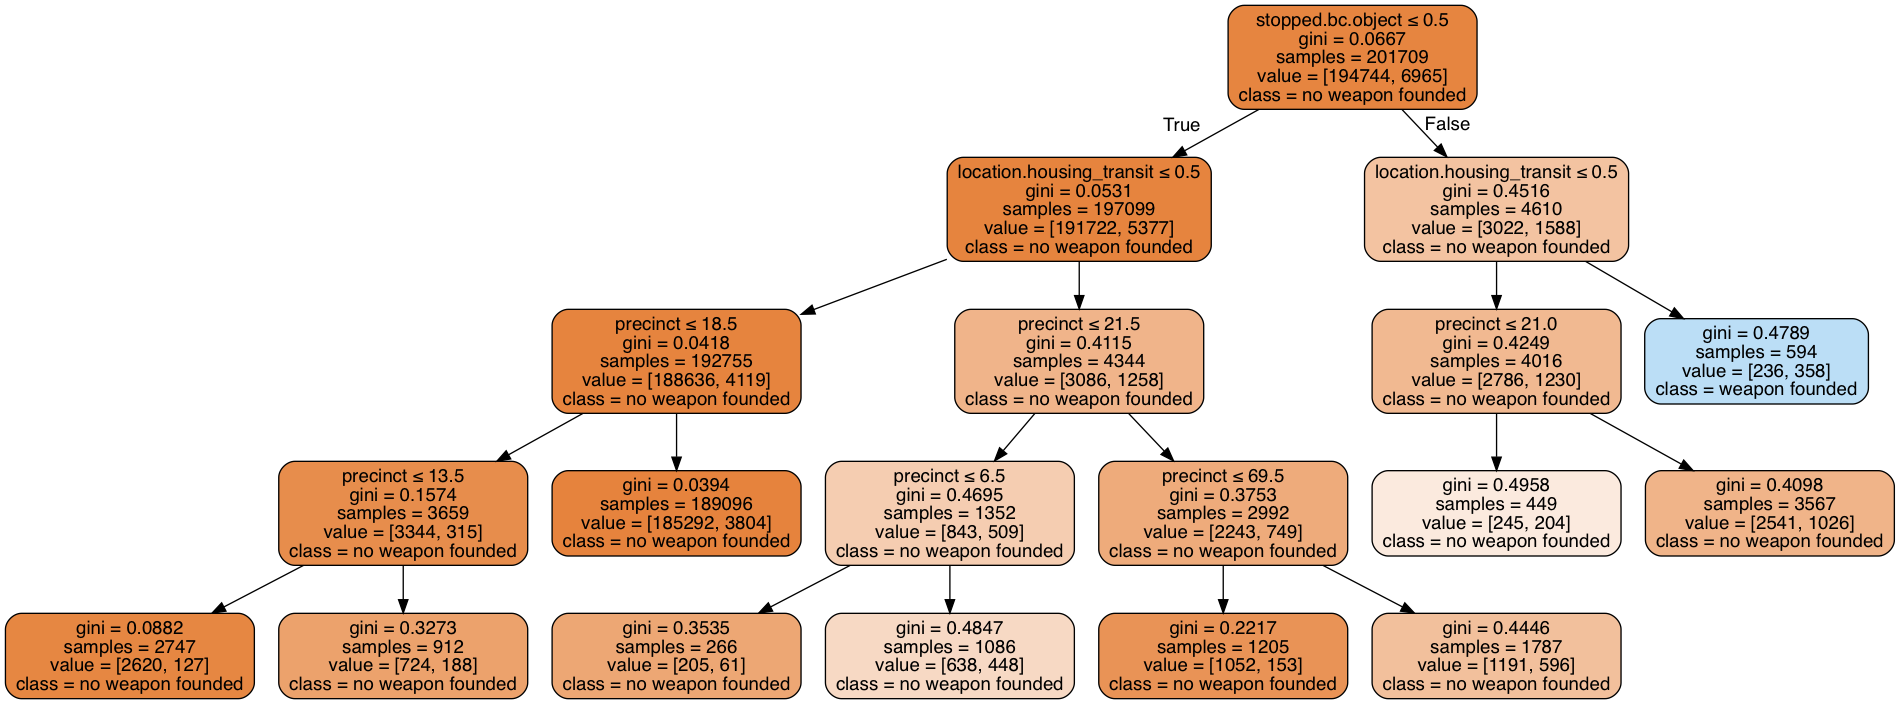

In [21]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(rf, out_file=dot_data,  
                         feature_names=["stopped.bc.object","location.housing_transit","precinct"],  
                         class_names=["no weapon founded","weapon founded"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Random Forests

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [120]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=10,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [121]:
pred=rf.predict_proba(X_test)[:,1]
print rs(np.array(Y_test.apply(int)),pred)

0.805262642999


### Practice Three. Let's fix max_leaf_nodes=10, try to build trees from 1 to 50 and take a look the AUC. (n_estimators from range(1,50,3))

In [122]:
res=[]
for i in range(1,50,2):
    rf = RFC(n_estimators=i, n_jobs=4,max_leaf_nodes=10)
    rf.fit(X_train, Y_train)
    pred=rf.predict_proba(X_test)[:,1]
    res.append(rs(np.array(Y_test.apply(int)),pred))
    print rs(np.array(Y_test.apply(int)),pred)

0.686709789743
0.740572511167
0.792129849035
0.787956908264
0.788637849523
0.769358054232
0.795002897308
0.797000304938
0.794243600807
0.804722971897
0.79116828747
0.796890290608
0.79719441247
0.798537730885
0.802479819116
0.800568569149
0.795571173941
0.79901297233
0.796741701543
0.799268265364
0.803888140984
0.801672440124
0.799696985202
0.810273943729
0.804254240829


### Analyze the result 

For this part, let's select two categorical features, and make two corresponding plots
comparing the average model prediction and empirical outcome for
each value of that feature. 

For example, if a chosen feature is
‘precinct’, the plot should have a point for each precinct, where the
x-value is the average model prediction for all stops in that precinct,
and the y-value is the average value of your target variable for all
stops in that precinct.

In [123]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC(n_estimators=50, n_jobs=4,max_leaf_nodes=30)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=30,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [124]:
#Select two features and save them with the result. Let's choose "age" and "precinct"
result=X_test.loc[:,['suspect.age','precinct']]
result=pd.concat((Y_test,result),axis=1)
result['pred_prob']=rf.predict_proba(X_test)[:,1]
result.index=range(len(result))

In [125]:
result.head()

,found.weapon,suspect.age,precinct,pred_prob
0,True,38,75,0.419689
1,False,22,41,0.018277
2,False,33,26,0.020486
3,False,44,79,0.020275
4,False,21,40,0.017360


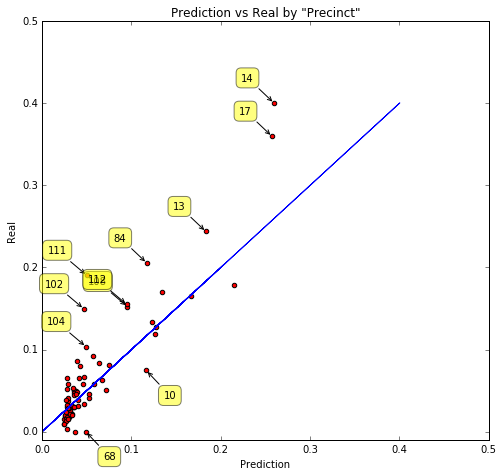

In [132]:
aa=result.groupby("precinct").apply(lambda x: x.loc[:,["found.weapon","pred_prob"]].mean()).reset_index()

aa.head()

#For precinct:
plt.figure(figsize=(8,7.5))
plt.scatter(list(aa.loc[:,"pred_prob"]),list(aa.loc[:,"found.weapon"]),c="r")
plt.title('Prediction vs Real by "Precinct"')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.xlim(0,0.5)
plt.ylim(-0.01,0.5)
plt.plot(list(aa.loc[:,"found.weapon"]),list(aa.loc[:,"found.weapon"]),'-b')

#Let's label the precincts for which our model does not work well.
for label, x, y in zip(list(aa.precinct), list(aa.loc[:,"pred_prob"]), list(aa.loc[:,"found.weapon"])):
    if x-y>0.04:
        
        plt.annotate(
            label, 
            xy = (x, y), xytext = (30, -30),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    if x-y<-0.05:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

### Practice Four

Repeat this process and plot the result for "Age" or for any feature you prefer.

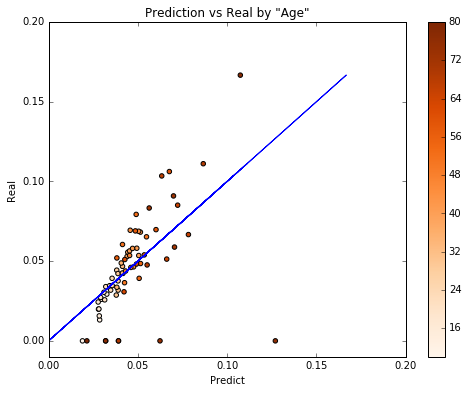

In [130]:
aa=result.groupby("suspect.age").apply(lambda x: x.loc[:,["found.weapon","pred_prob"]].mean()).reset_index()

aa.head()

plt.figure(figsize=(8,6))
plt.scatter(aa.loc[:,"pred_prob"],aa.loc[:,"found.weapon"],c=aa.loc[:,"suspect.age"], cmap=plt.cm.Oranges)
plt.colorbar()
plt.title('Prediction vs Real by "Age"')
plt.xlabel("Predict")
plt.ylabel("Real")
plt.xlim(0,0.2)
plt.ylim(-0.01,0.2)
plt.plot(aa.loc[:,"found.weapon"],aa.loc[:,"found.weapon"],'-b')
plt.show()